# K nearest neighbours, week 12 demo

## Libraries and settings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from math import sqrt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [3]:
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

## k Nearest Neighbours

In [ ]:
# model is computed when predicting
# follows example at realpython.com/knn-python

In [348]:
abalone = pd.read_csv("../demo/abalone.csv")
abalone.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [349]:
df = abalone.drop("Sex", axis=1)
df.shape

(4177, 8)

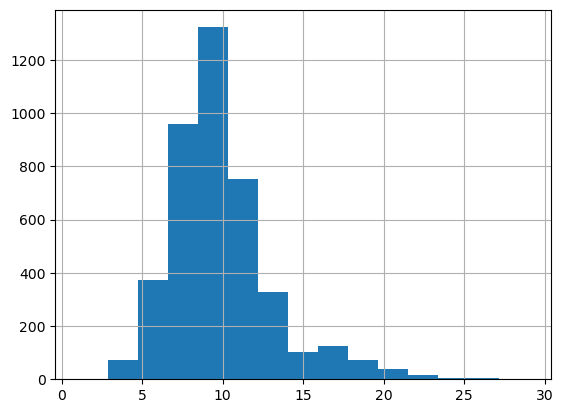

In [350]:
df["Rings"].hist(bins=15)
plt.show()

In [351]:
corr_matrix = df.corr()
corr_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [353]:
X = df.drop("Rings", axis=1)
X = X.values # convert dataframe to np.array
X.shape

(4177, 7)

In [355]:
y = df.Rings
y = y.values

In [357]:
new_data_point = np.array([0.5, 0.4, 0.15, 1, 0.4, 0.2, 0.3])
distances = np.linalg.norm(X - new_data_point, axis=1)
print(distances.shape)
print(distances)

(4177,)
[0.5528 0.9002 0.3714 ... 0.2704 0.2295 1.1561]


In [359]:
k = 3
nearest_neighbour_ids =  distances.argsort()[:k]
nearest_neighbour_ids

array([  82,  723, 2978])

In [360]:
nn_rings = y[nearest_neighbour_ids]
nn_rings

array([16, 15,  8])

In [361]:
y_pred = nn_rings.mean()
y_pred

13.0

In [362]:
# redo using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [367]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [372]:
train_predicts = model.predict(X_train)
mse = mean_squared_error(y_train, train_predicts)
rmse = sqrt(mse)
print(np.format_float_positional(rmse, precision=4)) # error in years

1.6643


In [371]:
test_predicts = model.predict(X_test)
mse = mean_squared_error(y_test, test_predicts)
rmse = sqrt(mse)
#print("%.4f {rmse} years".)
print(np.format_float_positional(rmse, precision=4))


2.4072


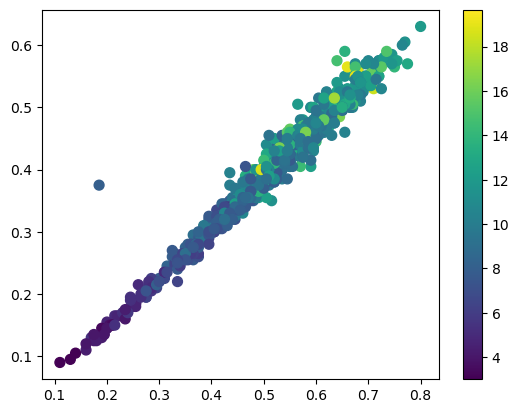

In [376]:
f, ax = plt.subplots()
points = ax.scatter(X_test[:,0], X_test[:,1], c=test_predicts, s=50)
f.colorbar(points)
plt.show()

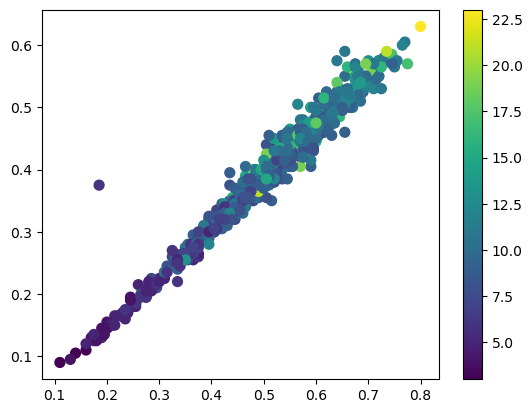

In [377]:
f, ax = plt.subplots()
points = ax.scatter(X_test[:,0], X_test[:,1], c=y_test, s=50)
f.colorbar(points)
plt.show()

In [378]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": range(1,50)}
gs_model = GridSearchCV(KNeighborsRegressor(), params)
gs_model.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [379]:
gs_model.best_params_

{'n_neighbors': 22}

In [381]:
model = KNeighborsRegressor(n_neighbors=22)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=22)

In [383]:
train_predicts = model.predict(X_train)
mse = mean_squared_error(y_train, train_predicts)
print(sqrt(mse))
# less overfitting than k=3 - rmse higher for Training...

2.039052561655222


In [382]:
test_predicts = model.predict(X_test)
mse = mean_squared_error(y_test, test_predicts)
print(sqrt(mse))
# while on Testing, slightly better error at 2.2 years rather than 2.4

2.2090296228724826


In [385]:
parameters = {
    "n_neighbors": range(1, 40),
    "weights": ["uniform", "distance"]
}
gs_model = GridSearchCV(KNeighborsRegressor(), parameters)
gs_model.fit(X_train, y_train)
gs_model.best_params_

{'n_neighbors': 22, 'weights': 'distance'}

In [386]:
test_predicts = gs_model.predict(X_test)
mse = mean_squared_error(y_test, test_predicts)
print(sqrt(mse))
# a tiny improvement from RMSE 2.209 to 2.204

2.204098931339065


In [391]:
bagged_knn = KNeighborsRegressor(n_neighbors=22, weights="distance")
from sklearn.ensemble import BaggingRegressor
bag_model = BaggingRegressor(bagged_knn, n_estimators=100)
bag_model.fit(X_train, y_train)
test_preds_grid = bag_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds_grid)
print(sqrt(mse))
# tiny improvement and only on third run of ensemble bagging

2.202584667047977
